In [1]:
def getTagsHandles(x):
    symbols = [' ', '\n', ',', '.', '/', '&', '?', ';', '[', ']', '!', ':', '•', '\\', ')']
    index = 0
    word = ""
    hh = []

    while(index < len(x)):
        if(x[index] == "@" or x[index] == "#"):
            if(word == ""):
                word = word + x[index]
            else:
                if(len(word) == 1):
                    word = "" + x[index]
                else:
                    hh.append(word)
                    word = ""
                    continue
        elif(x[index] in symbols or ord(x[index]) == 8230):
            if(word != ""):
                hh.append(word)
                word = ""
        else:
            if(word == ""):
                index = index + 1
                continue
            else:
                word = word + x[index]

        index = index + 1
    if(len(word) > 1):
        hh.append(word)
        
    return (hh)

In [2]:
import winsound
import time
import sys

f = open("twitter_dataset.txt", "r")
c = 0
userName = {}
username = ""
geolocation = "GeoLocation;@"
dictionaryForHashtagsHandles = {}

start = time.clock()
for line in f:
    c = c + 1
    line = line.replace('\t', " ")
    splittedTweet = line.split(" ")
    for i in range(len(splittedTweet)):
        if(splittedTweet[i].isdigit()):
            if(not(splittedTweet[i - 1] in userName)):
                userName[splittedTweet[i - 1]] = []
                username =splittedTweet[i - 1]
            break
    if (not("RT" in splittedTweet)):
        isEmpty = True
        for item in splittedTweet:
            if ("#" in item or "@" in item):
                if("@" in item):
                    if(geolocation in item):
                        continue
                for element in getTagsHandles(item):
                    isEmpty = False
                    element = element.lower()
                    if(not(element in dictionaryForHashtagsHandles)):
                        dictionaryForHashtagsHandles[element] = 1
                    else:
                        dictionaryForHashtagsHandles[element] = dictionaryForHashtagsHandles[element] + 1
                    userName[username].append(element)

f.close()
end = time.clock()
print("TIME: " + str(end - start) + "\n")
winsound.Beep(400, 2500)

TIME: 526.5262913536241



In [3]:
print("How many users: " + str(len(userName)) + "\n")
print("How many hashtags & handles: " + str(len(dictionaryForHashtagsHandles)))

How many users: 305245

How many hashtags & handles: 648150


Sto lexiko "userNameListWithSumUpTwenty" yparxoun oi xrhstew me synolo apo hashtags & handles > 20 , kai to value tou lexikou einai ena synolo me ta hashtags kai ta handles pou exoun xrisimopoihsei
Sto lexiko "hashtagsHandlesWithSumUpTwenty" yparxoun ta hashtags kai ta handles me plithos > 20 

In [4]:
import winsound
import time 

usersNameCountDictionary = {}
userNameCounter = {}
userNameListWithSumUpTwenty = {}
hashtagsHandlesWithSumUpTwenty = {}
newSetForHashtagsHandles = []

start = time.clock()
for i in userName:
    if(len(userName[i]) < 20):
        #userNameListWithSumUpTwenty[i] = set([])
        continue
    if(len(set(userName[i])) > 20):
        userNameListWithSumUpTwenty[i] = set(userName[i])

for i in dictionaryForHashtagsHandles:
    if(dictionaryForHashtagsHandles[i] > 20):
        hashtagsHandlesWithSumUpTwenty[i] = dictionaryForHashtagsHandles[i]
        newSetForHashtagsHandles.append(i)

newSetForHashtagsHandles = set(newSetForHashtagsHandles)
end = time.clock()
print("TIME: " + str(end - start) + "\n")
print("How many users up 20: " + str(len(userNameListWithSumUpTwenty)) + "\n")
print("How many hashtags & handles up 20: " + str(len(hashtagsHandlesWithSumUpTwenty)) + "\n")
winsound.Beep(400, 2500)

TIME: 2.340228723365726

How many users up 20: 17658

How many hashtags & handles up 20: 26661



Kladema gia na vrw tous xrhstes me sum > 20. Tha afairesw apo to synolo tou kathe xrhsth ta hashtags kai handles pou den exoun sum > 20

In [5]:
import winsound
import time

start = time.clock()
lenBefore = 110
lenAfter = 100
cBefore = 110
cAfter = 100

while(lenBefore > lenAfter):
    
    #To periexomeno tou lexikou diamorfwnete, twra o kathe xrhsths exei san value ta nea hashtags kai handles
    #me vasi auta pou einai twra sto synolo me sum > 20
    newSetForUser = []
    for users in userNameListWithSumUpTwenty:
        for items in userNameListWithSumUpTwenty[users]:
            if(items in newSetForHashtagsHandles):
                newSetForUser.append(items)
        userNameListWithSumUpTwenty[users] = set(newSetForUser)
        newSetForUser = []
    
    #Tha valw timh = 0 gia tous xrhstes me sum < 20
    cAfter = 0
    for users in userNameListWithSumUpTwenty:
        if(len(set(userNameListWithSumUpTwenty[users])) < 20):
            userNameListWithSumUpTwenty[users] = set([])
        else:
            if(len(set(userNameListWithSumUpTwenty[users])) > 20):
                cAfter = cAfter + 1
                
    print("Users after: " + str(cAfter) + "\n")
    
    #Tha mhdenisw to plithos twn hashtags kai handles pou eixa mesa sto lexiko mou
    for items in hashtagsHandlesWithSumUpTwenty:
        hashtagsHandlesWithSumUpTwenty[items] = 0
    
    #The metrisw to kainourio plithos tous xana
    for users in userNameListWithSumUpTwenty:
        for items in userNameListWithSumUpTwenty[users]:
            if(items in newSetForHashtagsHandles):
                hashtagsHandlesWithSumUpTwenty[items] = hashtagsHandlesWithSumUpTwenty[items] + 1
        lenBefore = len(newSetForHashtagsHandles)

    print("Size of hashtags and handles Before: " + str(lenBefore) + "\n")
    
    #Ftiaxnw xana to neo synolo me ta hashtags kai handles pou exoun sum > 20
    newSetForHashtagsHandles = set([])
    for items in hashtagsHandlesWithSumUpTwenty:
        if(hashtagsHandlesWithSumUpTwenty[items] > 20):
            newSetForHashtagsHandles.add(items)
        lenAfter = len(newSetForHashtagsHandles)
    print("Size of hashtags and handles After: " + str(lenAfter) + "\n")  

end = time.clock()
print("TIME: " + str(end - start) + "\n")
print("How many users up 20: " + str(cAfter))
winsound.Beep(400, 2700)

Users after: 8096

Size of hashtags and handles Before: 26661

Size of hashtags and handles After: 3424

Users after: 5771

Size of hashtags and handles Before: 3424

Size of hashtags and handles After: 2835

Users after: 5454

Size of hashtags and handles Before: 2835

Size of hashtags and handles After: 2722

Users after: 5377

Size of hashtags and handles Before: 2722

Size of hashtags and handles After: 2691

Users after: 5362

Size of hashtags and handles Before: 2691

Size of hashtags and handles After: 2686

Users after: 5360

Size of hashtags and handles Before: 2686

Size of hashtags and handles After: 2685

Users after: 5360

Size of hashtags and handles Before: 2685

Size of hashtags and handles After: 2684

Users after: 5360

Size of hashtags and handles Before: 2684

Size of hashtags and handles After: 2684

TIME: 10.102408707475092

How many users up 20: 5360


Tha typwsw to plithos twn hashtags & handles pou exoun sum > 20

In [6]:
e = 0

for i in hashtagsHandlesWithSumUpTwenty:
    if(not(hashtagsHandlesWithSumUpTwenty[i] == 0)):
        e = e + 1
        
print("Hashtags & handles with sum up 20: " + str(e))

Hashtags & handles with sum up 20: 2684


Telika lexika me tous users kai ta hashtags/handles pou exoun xrhsimopoihsei

In [7]:
finalUsers = {}

for i in userNameListWithSumUpTwenty:
    if(len(userNameListWithSumUpTwenty[i]) > 20):
        finalUsers[i] = userNameListWithSumUpTwenty[i]
print(str(len(finalUsers)))

5360


Teliko lexiko gia ta hashtags/handles pou exoun sum up 20

In [8]:
finalHashtagsHandles = {}

for i in hashtagsHandlesWithSumUpTwenty:
    if(hashtagsHandlesWithSumUpTwenty[i] > 20):
        finalHashtagsHandles[i] = hashtagsHandlesWithSumUpTwenty[i]
print(str(len(finalHashtagsHandles)))

2684


Metatropi twn string twn hashtags & handles se 32-bits akeraious

In [9]:
import binascii

def hashString(s):
    b = s.encode('ascii')
    h = binascii.crc32(b) & 0xffffffff
    return h

In [10]:
import winsound
convertStringsIntoInteger = {}

for i in finalHashtagsHandles:
    if("’" in i):
        i = i.replace("’", "'")
    convertStringsIntoInteger[i] = hashString(i)

winsound.Beep(400, 2000)

Tha metatrwpse kai to lexiko me tous users to periexomeno tous na einai 32-bits

In [11]:
import winsound
convertUsers = {}

for users in finalUsers:
    convertUsers[users] = []
    for items in finalUsers[users]:
        if("’" in items):
            items = items.replace("’", "'")
        convertUsers[users].append(hashString(items))

winsound.Beep(400, 2000)

Ektypwnw 3 users kai to periexomeno twn hashtags/handles tous se morfh 32-bits

In [12]:
r = 0

for i in convertUsers:
    r = r + 1
    print(i)
    print(convertUsers[i])
    print("--------------\n")
    if(r == 3):
        break

wooster6
[3770876220, 804402766, 1589785935, 304537208, 290086226, 2612184899, 3938616959, 991426737, 120550377, 91055218, 510721233, 669362533, 3928908167, 4251731539, 2812151552, 2658841998, 3444886167, 1068471465, 3668508978, 4022293843, 2492892668, 4104945449, 4235277050, 293109309, 538172218, 3582871488, 687335462, 1142036977, 1843776860, 4054526568]
--------------

jake_trotman
[1626238884, 1888347344, 1196244905, 1392443943, 4070084331, 1361408837, 1210960757, 304537208, 1882529777, 137605570, 537339938, 2880513014, 3349629660, 3489785869, 68751695, 2652366093, 4155483592, 2156972938, 3311819313, 974884422, 650519045, 4084916164, 1348172920, 2123116652, 1768128627, 2713057326, 1117477767, 3400344775, 972138645, 3391283631, 3293148681, 1278151211, 655927705, 467989673, 995748953, 3752993772, 3968735566, 838696968, 2470189417, 1812400656, 3714462476, 2035561429, 1117505928, 665305171, 4259062774, 1058959830, 2773310629, 3383959782, 4194957799, 2858833413, 1373055327, 3577068077]
-

Typwnw 5 hashtags/handles kai tin morfh pou exoun san akeraioi

In [13]:
f = 0

for i in convertStringsIntoInteger:
    f = f + 1
    print(i + " " + str(convertStringsIntoInteger[i]) + "\n")
    if(f == 5):
        break

@nissanusa 1697985572

#heismanhouse 535282446

@vine 1361408837

@brithume 3005783194

@donaldjtrumpjr 2848451318



Lista me ola ta string san arithmoi

In [14]:
listaWithAllStringAsInteger = []

for i in convertStringsIntoInteger:
    listaWithAllStringAsInteger.append(convertStringsIntoInteger[i])
print(listaWithAllStringAsInteger[0:9])

[1697985572, 535282446, 1361408837, 3005783194, 2848451318, 1802269374, 3118217113, 304537208, 1424613637]


Ftiaxnw ton 2D pinaka(lista apo listes) pou periexei 0 kai 1

In [15]:
import winsound

dic = {}

for users in convertUsers:
    l = convertUsers[users]
    dic[users] = [0] * len(finalHashtagsHandles)
    for i in l:
        for items in range(len(listaWithAllStringAsInteger)):
            if(i == listaWithAllStringAsInteger[items]):
                dic[users][items] = 1
                
winsound.Beep(400, 2000)

Tha antistoixisw arithous ston kathe xrhsth apo to 1-len(finalUsers)
[0 thesh, 1 thesh, 2 thesh, ..., 5636 thesh]

In [16]:
usersWithIndex = []

for i in finalUsers:
    usersWithIndex.append(i)
    
print(usersWithIndex[0:3])

['wooster6', 'jake_trotman', 'gayletrotter']


Ftiaxnw ton pinaka arxika me 1 kai 0. 0 an den yparxei to sygkekrimeno hashtag/handle ston user kai 1 an yparxei. Ton metatrepw se katallhlh domh me numy gia na ginontai pio grigora oi praxeis pou exw na kanw.

In [17]:
import numpy as np
minHashTable = []

for i in usersWithIndex:
    minHashTable.append(dic[i])

minHashTable = np.array(minHashTable)

Xaxis = users, Yaxis = 32-bit hashtags/handles

In [18]:
import numpy as np

#print(minHashTable)
tMinHashTable = minHashTable.T
print(tMinHashTable)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


Tha ftiaxw ena lexiko opou gia ton kathe xrhsth ua exei mia lista kai mesa tha periexei ton arithmo ths grammhw opou exei timh 1

In [19]:
import winsound

d = {}
for i in range(0, len(finalUsers)):
    d[i] = []
    
for i in range(0, len(listaWithAllStringAsInteger)):
    for j in range(0, len(finalUsers)):
        if(tMinHashTable[i][j] == 1):
            d[j].append(i)
            
winsound.Beep(400, 2000)

Prepei na vrw tis theseis pou exoun 1 

In [20]:
import winsound
import scipy.sparse as sp_sparse
import numpy as np

sparse = []

for i in range(len(tMinHashTable)):
    for j in range(len(tMinHashTable[i])):
        if(tMinHashTable[i][j] == 1):
            sparse.append([i, j, 1])
            
sparse = np.array(sparse)     
#print(sparse)
row = sparse[:,0]
col = sparse[:,1]
data = sparse[:,2]
M = sp_sparse.csr_matrix((data,(row,col)), shape=(len(listaWithAllStringAsInteger), len(usersWithIndex)))
winsound.Beep(400, 2000)

Tha vroume to actual(pragmatiko) Jaccard Similarity gia ola ta zeygaria

In [21]:
def jaccardSimilarity(x, y):
    unionList = x + y
    unionList = set(unionList)
    enwsh = (len(unionList))
    tomh = set(x).intersection(y)
    
    js = float(len(tomh))/float(enwsh)
    return(js)

In [22]:
import winsound
import numpy as np
import sklearn.metrics as metrics

actualJS = {}
listaActualJS = []

for i in range(len(finalUsers)):
    if(i == 1000 or i == 2000 or i == 3000 or i == 4000 or i == 5000):
        print(i)
    for j in range(i+1 , len(finalUsers)):
        jsValue = jaccardSimilarity(d[i], d[j])
        listaActualJS.append(jsValue)
        actualJS["(" + usersWithIndex[i] + "," + usersWithIndex[j] + ")"] = jsValue
    #break
#print(actualJS)
winsound.Beep(400, 2000)

1000
2000
3000
4000
5000


In [23]:
print(len(listaActualJS))

14362120


To plithos twn zeygwn pou exoun actual js

In [24]:
import winsound

counterActualJS = 0
threshold = 0.8
listaWithUpThresholdJSNames = []
listaWithUpThresholdJS = []

for i in actualJS:
    if(actualJS[i] > threshold):
        listaWithUpThresholdJSNames.append(i)
        listaWithUpThresholdJS.append(actualJS[i])
        counterActualJS = counterActualJS + 1
print("Actual Jaccard Similarity: " + str(counterActualJS))

winsound.Beep(400, 2000)

Actual Jaccard Similarity: 23


Ektypwnw ta 23 zeygaria pou einia omoia > 0.8 

In [24]:
for i in range(len(listaWithUpThresholdJSNames)):
    print(str(listaWithUpThresholdJSNames[i]) + ": " + str(listaWithUpThresholdJS[i]) + "\n")

(RealAlexJones,infowars): 0.8372093023255814

(Able_49,Doug_39): 0.9692307692307692

(Able_49,Earl_59): 0.9545454545454546

(Able_49,Chad_59): 0.9541984732824428

(Able_49,ggeett37aaa): 0.9402985074626866

(Able_49,dansch2002): 0.8939393939393939

(Able_49,Bart_39): 0.9847328244274809

(Doug_39,Earl_59): 0.984375

(Doug_39,Chad_59): 0.984251968503937

(Doug_39,ggeett37aaa): 0.9541984732824428

(Doug_39,dansch2002): 0.921875

(Doug_39,Bart_39): 0.9692307692307692

(Earl_59,Chad_59): 0.9689922480620154

(Earl_59,ggeett37aaa): 0.9398496240601504

(Earl_59,dansch2002): 0.9076923076923077

(Earl_59,Bart_39): 0.9545454545454546

(Chad_59,ggeett37aaa): 0.9393939393939394

(Chad_59,dansch2002): 0.9069767441860465

(Chad_59,Bart_39): 0.9541984732824428

(ggeett37aaa,dansch2002): 0.8796992481203008

(ggeett37aaa,Bart_39): 0.9259259259259259

(dansch2002,Bart_39): 0.8939393939393939

(Forprinciple16,goheels_70): 0.9714285714285714



Gia to kathe hashtag/handle tha exw mia lista me periexomeno ton users pou to exei xrhsimopoihsei

In [25]:
import winsound

listaForHashtag = []

for i in range(len(tMinHashTable)):
    #print(i)
    listaForHashtag.append([])
    for j in range(len(finalUsers)):
        if(tMinHashTable[i][j] == 1):
            listaForHashtag[i].append(j)
print(len(listaForHashtag))
winsound.Beep(400, 2900)

2684


Gia to kathe hash function pou tha ftiaxnetai tha kalw mia synarthsh thn findHashSignatures() h opoia tha mou epistrefei mia lista me ta apotelesmata ths.

In [26]:
import winsound
from random import randint

def findHashSignatures():
    l = []
    a = randint(0,4294967296)
    b = randint(0,4294967296)
    R = 4294967311
    
    for i in range(len(listaWithAllStringAsInteger)):
        p = (a*listaWithAllStringAsInteger[i] + b)%R
        l.append(p)
    
    #print("Hash function: " + str(a) + "X + " + str(b) + " mod " + str(R) + "\n")
    return(l)
winsound.Beep(400, 3000)

H metavlhth "howManyHashFunction = 10" deixnei oti tha vrei 10 synarthseis, gia na to trwxoume gia 50, 100, 200 pou thelei h askhsh tha prepei na allaxoume autin tin timh kai na ta trexoume ta akoloutha me thn seira

In [27]:
import winsound

howManyHashFunction = 10
returnHashF = []
for i in range(howManyHashFunction):
    returnHashF.append(findHashSignatures())

winsound.Beep(400, 3000)

Hash function: 788692594X + 1992339873 mod 4294967311

Hash function: 2117524121X + 3233484674 mod 4294967311

Hash function: 2169015590X + 4121809483 mod 4294967311

Hash function: 3551208736X + 1291498612 mod 4294967311

Hash function: 1044710710X + 4288594688 mod 4294967311

Hash function: 2193764507X + 615948017 mod 4294967311

Hash function: 2946588454X + 3263126116 mod 4294967311

Hash function: 791310231X + 98437900 mod 4294967311

Hash function: 2752799268X + 526207102 mod 4294967311

Hash function: 4104749156X + 2196065586 mod 4294967311



In [30]:
import winsound
table = createTableForHashes(howManyHashFunction)

for i in range(len(listaForHashtag)):
    k = (listaForHashtag[i])
    for eachFunction in range(len(returnHashF)):
        kk = returnHashF[eachFunction]
        for columns in k:
            if(table[eachFunction][columns] > kk[i]):
                #print("OK\n")
                table[eachFunction][columns] = kk[i]
        
print(len(table))
winsound.Beep(400, 3000)

10


Tha ftiaxw ton pinaka me grammes oses einai kai oi hash functions kai sthles osoi einai oi users. Tha to arxikopoihsw sto 2^50(san na einai to apeiro estw)

In [27]:
import math

def createTableForHashes(itera):
    hashTable = []
    for i in range(itera):
        hashTable.append([])
        for j in range(len(finalUsers)):
            number = math.pow(2,50)
            hashTable[i].append(number)
    return (hashTable)

Mesa stin lista "listaMeOlesTisStiles" periexei gia kathe user mia lista me periexomeno ta apotelesmata apo ton teliko tabme

In [32]:
import winsound
listaA = []
listaMeOlesTisStiles = []

#len(finalUsers)
for i in range(len(finalUsers)):
    listaMeOlesTisStiles.append([])
    listaA = []
    for j in range(howManyHashFunction):
        listaA.append((table[j][i]))
    listaMeOlesTisStiles[i] = listaA

winsound.Beep(400, 2000)

Synarthsh gia na ypologizei to Jaccard Similarity otan exoume ta hash functions

In [33]:
def findJaccardSimilarityForHashFunction(x, y, div):
    similarCounter = 0
    
    for i in range(len(x)):
        if(x[i] == y[i]):
            similarCounter = similarCounter + 1
    return(float(similarCounter)/float(div))

Tha prepei na ypologisw thn omoiothta anamesa se olous tous users kai tha ta apotelesmata tha ta valw mesa se ena lexiko "hashFunctionJS"

In [34]:
import winsound

hashFunctionJS = {}
threshold = 0.8
counterForUsersUpThreshold = 0
listaMeTaZeygaria = {}
listaHashFunction = []

for i in range(len(listaMeOlesTisStiles)):
    if(i == 1000 or i == 2000 or i == 3000 or i == 4000 or i == 5000):
        print(i)
    for j in range(i + 1, len(listaMeOlesTisStiles)):
        x = listaMeOlesTisStiles[i]
        y = listaMeOlesTisStiles[j]
        js = findJaccardSimilarityForHashFunction(x, y, howManyHashFunction)
        if(js > threshold):
            listaMeTaZeygaria["(" + usersWithIndex[i] + "," + usersWithIndex[j] + ")"] = js
            counterForUsersUpThreshold = counterForUsersUpThreshold + 1
        listaHashFunction.append(js)
        hashFunctionJS["(" + usersWithIndex[i] + "," + usersWithIndex[j] + ")"] = js

print("Similarity up 0.8: " + str(counterForUsersUpThreshold))
winsound.Beep(400, 3000)

1000
2000
3000
4000
5000
Similarity up 0.8: 22


In [35]:
for i in listaMeTaZeygaria:
    print(str(i) + ": " + str(listaMeTaZeygaria[i]))
#print(listaMeTaZeygaria)

(Able_49,Doug_39): 1.0
(Able_49,Earl_59): 1.0
(Able_49,Chad_59): 1.0
(Able_49,ggeett37aaa): 1.0
(Able_49,dansch2002): 0.9
(Able_49,Bart_39): 1.0
(Doug_39,Earl_59): 1.0
(Doug_39,Chad_59): 1.0
(Doug_39,ggeett37aaa): 1.0
(Doug_39,dansch2002): 0.9
(Doug_39,Bart_39): 1.0
(Earl_59,Chad_59): 1.0
(Earl_59,ggeett37aaa): 1.0
(Earl_59,dansch2002): 0.9
(Earl_59,Bart_39): 1.0
(Chad_59,ggeett37aaa): 1.0
(Chad_59,dansch2002): 0.9
(Chad_59,Bart_39): 1.0
(ggeett37aaa,dansch2002): 0.9
(ggeett37aaa,Bart_39): 1.0
(dansch2002,Bart_39): 0.9
(Forprinciple16,goheels_70): 0.9


Thw prepei na ypologisw to SEE. Akolouthei h synarthsh

In [36]:
import math

def see(listaActualJS, listaHashFunction):
    sumOfJS = 0
    
    for i in range(len(listaActualJS)):
        sumOfJS = sumOfJS + math.pow((listaActualJS[i] - listaHashFunction[j]), 2)
        
    return(sumOfJS)

In [37]:
import winsound

print("Sum of square errors: " + str(see(listaActualJS, listaHashFunction)))
winsound.Beep(400, 3000)

Sum of square errors: 58018.59273139535


Ypologizw to plithos twn false positives

In [78]:
import winsound 

fpCounter = 0
fnCounter = 0

for i in range(len(listaActualJS)):
    if(listaActualJS[i] < 0.8 and listaHashFunction[i] > 0.8):
        fpCounter = fpCounter + 1
    if(listaHashFunction[i] < 0.8 and listaActualJS[i] > 0.8):
        fnCounter = fnCounter + 1
        
print("False Positives: " + str(fpCounter) + "\n")
print("False Negatives: " + str(fnCounter) + "\n")
winsound.Beep(400, 3000)

False Positives: 0

False Negatives: 0



Thw ftiaxw ta grafhmata

Grafhma gia to plithos twn zeygariwn pou exoun omoiothta > 0.8. Sthn thesh 1 antistoixei to plithos gia to actualJS, apo to 10 ews to 200 gia antistoixoun gia to plithos tws xeygariwn anaologa me to plithos twn synarthsewn

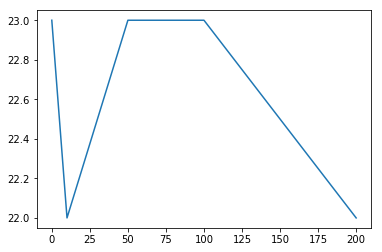

In [84]:
import matplotlib.pyplot as plt
x = [0, 10, 50, 100, 200]
y = [23, 22, 23, 23, 22]
plt.plot(x, y)
plt.show()

Grafhma gia to SEE

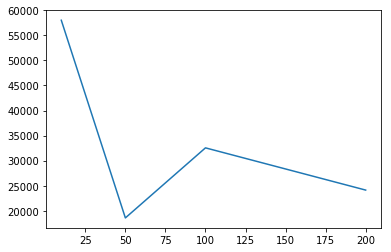

In [85]:
import matplotlib.pyplot as plt
x = [10, 50, 100, 200]
y = [58018.59273139535, 18556.71379723621,  32542.80526484124, 24113.547530400258]
plt.plot(x, y)
plt.show()

Grafhma gia FP

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt


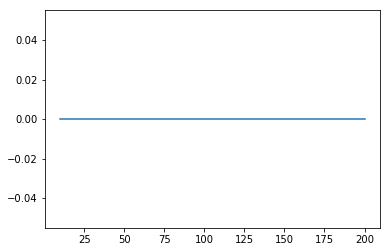

In [86]:
import matplotlib.pyplot as plt
x = [10, 50, 100, 200]
y = [0, 0, 0, 0]
plt.plot(x, y)
plt.show()

Grafha gia FN

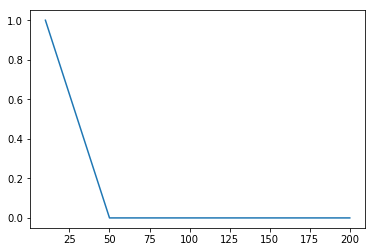

In [87]:
import matplotlib.pyplot as plt
x = [10, 50, 100, 200]
y = [1, 0, 0, 0]
plt.plot(x, y)
plt.show()

Tha ylopoihsw twra to LSH

Prepei na vrw times gia ta b kai r

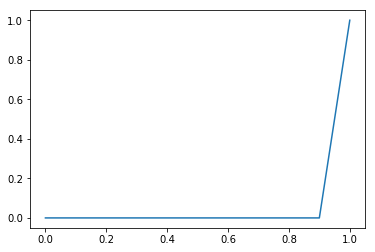

In [166]:
import math
import matplotlib.pyplot as plt
import winsound 

b = 500
r = 200
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = []
ola = []

while(b <= 550):
    for s in x:
        q1 = (1 - math.pow(s, r))
        t = 1 - math.pow(q1, b)
        y.append(t)
    y = []
    ola.append(y)
    b = b + 50
    
for i in ola:
    if(len(i) > 0):
        plt.plot(x, i)
        plt.show()
        
winsound.Beep(450, 3000)

Kanwnstas diafora peimata me tis times twn b kai r vrika oti: kratwnstas thn parametro b stamerhkai alazontas thn timh ths parametrou r vrika oti exwntas 50 hash synarthseis h apotomh allagh ginetai akrivws sto 0.8 ekei pou theloume na doume poia einai perissotero omoia ta zeygaria. Opote kratwnstas thn timh ths parametrou r = 50 ekana dokimes gia thn timh ths parametrou b. Xekinhsa apo b = 500 mexri 1000 kai auxana to b kata 50. Kai fainetai oti exw to apotelesma pou perimena. Eidika gia b = 1000 kai r = 50 exw mia kali proseggish gia to pote yparxei auth h allagh ths kampylis gia t = 0.8. 

In [30]:
import winsound 

b = 500
r = 50
listaMeOlaTaZeygaria = {}
falsePosotivesCounter = 0
falseNegativesCounter = 0

for iterations in range(b):
    print(iterations)
    returnHashFunctionLSH = []
    for i in range(r):
        returnHashFunctionLSH.append(findHashSignatures())

    tableLSH = createTableForHashes(r)

    for i in range(len(listaForHashtag)):
        k = (listaForHashtag[i])
        for eachFunction in range(len(returnHashFunctionLSH)):
            kk = returnHashFunctionLSH[eachFunction]
            for columns in k:
                if(tableLSH[eachFunction][columns] > kk[i]):
                    tableLSH[eachFunction][columns] = kk[i]
        
    #gia kathe users tha parw thn sthlh tou dhladh tis times gia kathe ypografh twn 50 hash function
    listaMeTisYpografesLSH = []
    for i in range(len(tableLSH[0])):
        listaMeTisYpografesLSH.append([])
        for j in range(r):
            listaMeTisYpografesLSH[i].append(tableLSH[j][i])

    lshDictionary = {}
    for elements in range(len(listaMeTisYpografesLSH)):
        if(not(str(listaMeTisYpografesLSH[elements]) in lshDictionary)):
            lshDictionary[str(listaMeTisYpografesLSH[elements])] = [elements]
        else:
            lshDictionary[str(listaMeTisYpografesLSH[elements])].append(elements)

    #Tha diaperasw to lexiko kai tha vrw ayta ta kleidia opou h timh tous exei megethos listas > 1
    for i in lshDictionary:
        if(len(lshDictionary[i]) > 1):
            print(lshDictionary[i])
            if(len(lshDictionary[i]) == 2):
                if(str(lshDictionary[i]) in listaMeOlaTaZeygaria):
                    continue
                listaMeOlaTaZeygaria[str(lshDictionary[i])] = 0
            else:
                for l1 in range(len(lshDictionary[i])):
                    for l2 in range(l1 + 1, len(lshDictionary[i])):
                        st = "[" + str(lshDictionary[i][l1]) + ", " + str(lshDictionary[i][l2]) + "]"
                        if(not(st in listaMeOlaTaZeygaria)):
                            listaMeOlaTaZeygaria[st] = 0
                    
    print("-----------------\n")

#plithos false positives
for i in listaMeOlaTaZeygaria:
    kleidi = str(i)
    kleidi = kleidi.replace("[", "")
    kleidi = kleidi.replace("]", "")
    merhKleidiou = kleidi.split(", ")
    onoma1 = ""
    onoma1 = onoma1 + "(" + str(usersWithIndex[int(merhKleidiou[0])]) + "," + str(usersWithIndex[int(merhKleidiou[1])]) + ")"
    onoma2 = ""
    onoma2 = onoma2 + "(" + str(usersWithIndex[int(merhKleidiou[1])]) + "," + str(usersWithIndex[int(merhKleidiou[0])]) + ")"
    print(onoma1)
    if(onoma1 in actualJS):
        if(actualJS[onoma1] < 0.8):
            falsePosotivesCounter = falsePosotivesCounter + 1
    if(onoma2 in actualJS):
        if(actualJS[onoma2] < 0.8):
            falsePosotivesCounter = falsePosotivesCounter + 1

falseNegativesCounter = 23 - len(listaMeOlaTaZeygaria)
print("Plithos zeugariwn:" + str(len(listaMeOlaTaZeygaria)))
print("False Positives: " + str(falsePosotivesCounter))
print("False Negatives: " + str(falseNegativesCounter))
winsound.Beep(450, 2000)

0
[1595, 1599, 1600]
-----------------

1
[1595, 4789]
[1599, 1604]
-----------------

2
[1595, 4789]
[1599, 1600, 1604]
-----------------

3
[1595, 4789]
[1599, 1604]
-----------------

4
[1595, 1599, 4789]
[3596, 4911]
-----------------

5
[1595, 4789]
-----------------

6
[1595, 4789]
[1599, 1604]
[3596, 4911]
-----------------

7
-----------------

8
[1599, 1600]
-----------------

9
[1595, 4789]
-----------------

10
-----------------

11
[1599, 1600, 2920]
-----------------

12
[1595, 4789]
[1599, 1604, 2920]
-----------------

13
[1599, 1600]
-----------------

14
[1599, 1604]
-----------------

15
[1595, 4789]
[1599, 1604]
-----------------

16
[1595, 4789]
[1599, 2920]
-----------------

17
-----------------

18
[1595, 1599, 1600]
[3596, 4911]
-----------------

19
[1599, 1600]
[3596, 4911]
-----------------

20
[1595, 4789]
[3596, 4911]
-----------------

21
[1595, 4789]
[1599, 1604]
-----------------

22
-----------------

23
[1595, 1599, 1600, 4789]
[3596, 4911]
-----------

Ektypwnw ta tweets twn xrhstwn: Able_49, Doug_39, Earl_59, Bart_39, Chad_59, ggeett37aaa, Forprinciple16, dansch2002, goheels_70

In [35]:
import winsound

twitterFile = open("twitter_dataset.txt", "r")

for line in twitterFile:
    line = line.replace('\t', " ")
    splittedTweet = line.split(" ")
    #print(splittedTweet)
    for i in range(len(splittedTweet)):
        if(splittedTweet[i].isdigit()):
            name = splittedTweet[i - 1]
            if(name == "Able_49" or name == "Doug_39" or name == "Earl_59" or name == "Bart_39" or name == "Chad_59" or name == "ggeett37aaa" or name == "Forprinciple16" or name == "dansch2002" or name == "goheels_70"):
                print(splittedTweet)
            break

twitterFile.close()
winsound.Beep(450, 2000)

['G', 'Able_49', '1957743416', '9749', '9214', 'TEXAS', 'Just', 'a', 'Patriot', 'who', 'wants', 'my', 'country', 'back,', 'IRS', 'abolished,', 'income', 'tax', 'replaced', 'by', '#FAIRtax', '&', 'fed', 'government', 'bound', 'by', 'chains', 'of', 't/constitution.', '#COSProject,', '#PJNET', 'Mon', 'Oct', '31', '09:03:31', 'EET', '2016', '792985335726641152', 'en', 'null', '12', '9', '"Politicians', 'are', 'the', 'lowest', 'forms', 'of', 'life', 'on', 'earth.', 'Liberal', 'Democrats', 'are', 'the', 'lowest', 'forms', 'of', 'politicians"', '-', 'General', 'George', 'S.', 'Patton\n']
['G', 'Able_49', '1957743416', '9749', '9214', 'TEXAS', 'Just', 'a', 'Patriot', 'who', 'wants', 'my', 'country', 'back,', 'IRS', 'abolished,', 'income', 'tax', 'replaced', 'by', '#FAIRtax', '&', 'fed', 'government', 'bound', 'by', 'chains', 'of', 't/constitution.', '#COSProject,', '#PJNET', 'Mon', 'Oct', '31', '08:17:51', 'EET', '2016', '792973842880704513', 'en', 'null', '0', '0', 'Have', 'you', 'had', 'enou